In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import requests as req
from datetime import datetime
from tweet_auth import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Create an empty list to append twitter data
tweet_result =[]

# Use function to repeat API calls 
def tweet_info (target_user):
    tweet_text=[]
    tweet_date=[]

# Have the data filter through 5 pages of 20 for 100 searches
    for x in range(5):
        target_user_tweets = api.user_timeline(target_user, page=x,since_id=None)
        
        for tweet in target_user_tweets:
            tweet_text.append(tweet["text"])
            tweet_date.append(tweet["created_at"])   
            #print(f'{tweet["text"]}') 
            tweet_result.append(tweet_text)
            tweet_result.append(tweet_date)
    return tweet_result    

# Run through the news outlets
tweet_info("@BBCNews")
BBCNews_texts=tweet_result[0]
BBCNews_date=tweet_result[1]
tweet_result =[]
last_id=None

tweet_info("@CBSNews")
CBSNews_texts=tweet_result[0]
CBSNews_date=tweet_result[1]
tweet_result =[]
last_id=None

tweet_info("@CNNnewsroom")
CNNnews_texts=tweet_result[0]
CNNnews_date=tweet_result[1]
tweet_result =[]
last_id=None

tweet_info("@FoxNews")
FoxNews_texts=tweet_result[0]
FoxNews_date=tweet_result[1]
tweet_result =[]
last_id=None

tweet_info("@nytimes")
nytimes_texts=tweet_result[0]
nytimes_date=tweet_result[1]

#print(tweet_result)

In [4]:
# Vader Analysis
analyzer = SentimentIntensityAnalyzer()

# Use function to populate dfs for each account
def vader_analysis(texts,dates):
    
    vader_df = pd.DataFrame({'Text':texts, 'Date':dates})
    vader_df['Positive']=''
    vader_df['Negative']=''
    vader_df['Neutral']=''
    vader_df['Compound']=''

    for index, row in  vader_df.iterrows():
        results = analyzer.polarity_scores(row['Text'])
        vader_df.set_value(index,"Compound",results["compound"])
        vader_df.set_value(index,'Positive',results["pos"])
        vader_df.set_value(index, 'Negative',results["neg"])
        vader_df.set_value(index,'Neutral',results["neu"])
    return vader_df

        
bbc_vader_df = vader_analysis(BBCNews_texts,BBCNews_date)
#print(bbc_vader_df)
cbs_vader_df = vader_analysis(CBSNews_texts,CBSNews_date)   
#print(cbs_vader_df)
cnn_vader_df = vader_analysis(CNNnews_texts,CNNnews_date)    
#print(cnn_vader_df)
fox_vader_df = vader_analysis(FoxNews_texts,FoxNews_date)
#print(fox_vader_df)
nytimes_vader_df = vader_analysis(nytimes_texts,nytimes_date)
#print(nytimes_vader_df)


In [82]:
# NY Times Table
nytimes_vader_df.to_csv('ny_times.csv') 
nytimes_vader_df.head()

,Date,Text,Positive,Negative,Neutral,Compound
0,Tue Mar 13 05:00:21 +0000 2018,"Servers ignore comments about their bodies, la...",0.171,0.118,0.711,0.2732
1,Tue Mar 13 04:47:01 +0000 2018,"RT @NYTStyles: ""As a gynecologist I am frequen...",0.056,0,0.944,0.0772
2,Tue Mar 13 04:32:07 +0000 2018,Scientists have found another way to tell alli...,0,0,1,0
3,Tue Mar 13 04:17:05 +0000 2018,“No one can predict what will happen to Cuba i...,0,0,1,0
4,Tue Mar 13 04:02:01 +0000 2018,President Trump is making his first visit as p...,0,0,1,0


In [83]:
# CBS Table
cbs_vader_df.to_csv('cbs.csv') 
cbs_vader_df.head()

,Date,Text,Positive,Negative,Neutral,Compound
0,Tue Mar 13 05:03:04 +0000 2018,High school soccer coach accused of sexually a...,0,0.379,0.621,-0.6705
1,Tue Mar 13 04:48:03 +0000 2018,Iowa Senate leader Bill Dix resigns after vide...,0.206,0.128,0.667,0.34
2,Tue Mar 13 04:33:04 +0000 2018,"Why this doctor recommends the ""Pegan"" diet ht...",0.192,0,0.808,0.2263
3,Tue Mar 13 04:18:07 +0000 2018,Authorities identify 5 victims killed in NYC h...,0,0.576,0.424,-0.8591
4,Tue Mar 13 04:03:04 +0000 2018,Police probe killing of Binghamton University ...,0,0.328,0.672,-0.6597


In [85]:
# CNN table
cnn_vader_df.to_csv('cnn.csv') 
cnn_vader_df.head()

,Date,Text,Positive,Negative,Neutral,Compound
0,Mon Mar 12 19:45:46 +0000 2018,"Despite polls showing otherwise, White House p...",0.129,0.105,0.766,0.128
1,Mon Mar 12 19:29:08 +0000 2018,"""If we were going to have a debate where we sh...",0,0,1,0
2,Mon Mar 12 19:00:29 +0000 2018,"""If you're not going to be against Ivanka Trum...",0,0,1,0
3,Mon Mar 12 18:47:16 +0000 2018,CNN's Areva Martin tells @BrookeBCNN that ther...,0,0.084,0.916,-0.1877
4,Mon Mar 12 17:30:25 +0000 2018,RT @CNN: The pair of explosions that left two ...,0.077,0.151,0.772,-0.4767


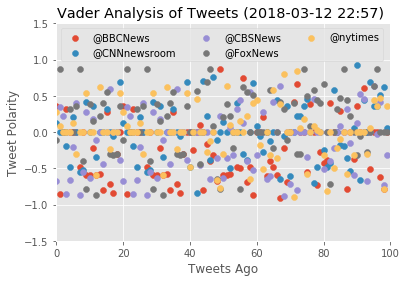

In [70]:
# Create plots
from matplotlib import style
style.use('ggplot')

news_list =[bbc_vader_df,cnn_vader_df,cbs_vader_df,fox_vader_df,nytimes_vader_df]

# Build scatter plots

for news in news_list:
    x = np.arange(len(news["Compound"]))
    plt.scatter(x, news["Compound"], alpha=1)



# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title("Vader Analysis of Tweets ({}) ".format(now))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plot = plt.legend(loc = 2, ncol = 3)
plot.get_texts()[0].set_text('@BBCNews')
plot.get_texts()[1].set_text('@CNNnewsroom')
plot.get_texts()[2].set_text("@CBSNews")
plot.get_texts()[3].set_text('@FoxNews')
plot.get_texts()[4].set_text('@nytimes')

plt.xlim(-.25, len(x))
plt.ylim(-1.5, 1.5)
plt.savefig("vader_analysis.png")
plt.show()

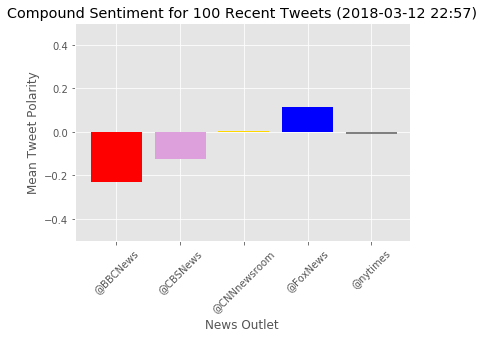

In [89]:
# Build combined sentiment bar chart
targets = ["@BBCNews", "@CBSNews", "@CNNnewsroom","@FoxNews", "@nytimes"]
x_axis = np.arange(len(targets))
y_axis = [bbc_vader_df['Compound'].mean(),cbs_vader_df['Compound'].mean(),cnn_vader_df['Compound'].mean(),fox_vader_df['Compound'].mean(),nytimes_vader_df['Compound'].mean()]
plt.bar(x_axis, y_axis, color=('red','plum','gold','blue','grey'), alpha=1, align="edge")
plt.title("Compound Sentiment for 100 Recent Tweets ({})".format(now))
plt.xlabel("News Outlet")
plt.ylabel("Mean Tweet Polarity")
plt.xlim(-.25, len(x_axis))
plt.ylim(-.5, .5)
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, targets,rotation=45)
#label = "{:.1f}".format(y_axis)
#plt.annotate(label,(x_axis,y_axis))
plt.savefig("agg_bar.png")
plt.show()